# Set up Environment

In [ ]:
# Activate Virtual Environment and Install Requirements
#!python3 -m venv ../chmenv
#!source ../chmenv/bin/activate
#!python3 -m ipykernel install --user --name=chmenv --display-name "Python (chmenv)"
#remember to switch to notebook/virtual environment kernel
#!pip install -r requirements.txt # install requirements text in new environment
#!jupyter kernelspec uninstall chmenv1

In [1]:
# Import Packages
import os
from pathlib import Path
import re

import numpy as np
import pandas as pd
import matplotlib

import shutil
import itertools

import nilearn
from nilearn.image import load_img
from nilearn.image import math_img
from nilearn import plotting, datasets
import glob

import nibabel as nib

# Meta Data and Image Labels

In [2]:
# Import Meta Data / Labels
## Weird thing going on with original data so had to open in excel and re-export as csv to fix
df = pd.read_csv('../ABIDEII/ABIDEII_Composite_Phenotypic.csv')
df.head()

,SITE_ID,SUB_ID,NDAR_GUID,DX_GROUP,PDD_DSM_IV_TR,ASD_DSM_5,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,...,ADI_R_C3_TOTAL,ADI_R_C4_REPETITIVE_USE_OBJECTS,ADI_R_C4_HIGHER,ADI_R_C4_UNUSUAL_SENSORY_INTERESTS,ADI_R_C4_TOTAL,ADI_R_D_AGE_PARENT_NOTICED,ADI_R_D_AGE_FIRST_SINGLE_WORDS,ADI_R_D_AGE_FIRST_PHRASES,ADI_R_D_AGE_WHEN_ABNORMALITY,ADI_R_D_INTERVIEWER_JUDGMENT
0,ABIDEII-BNI_1,29006,NaN,1,NaN,NaN,48.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABIDEII-BNI_1,29007,NaN,1,NaN,NaN,41.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABIDEII-BNI_1,29008,NaN,1,NaN,NaN,59.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABIDEII-BNI_1,29009,NaN,1,NaN,NaN,57.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABIDEII-BNI_1,29010,NaN,1,NaN,NaN,45.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_long = pd.read_csv('../ABIDEII/ABIDEII_Long_Composite_Phenotypic.csv')
df_long.head()

,SITE_ID,SUB_ID,SESSION,NDAR_GUID,DX_GROUP,PDD_DSM_IV_TR,ASD_DSM_5,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,...,ADI_R_C3_TOTAL,ADI_R_C4_REPETITIVE_USE_OBJECTS,ADI_R_C4_HIGHER,ADI_R_C4_UNUSUAL_SENSORY_INTERESTS,ADI_R_C4_TOTAL,ADI_R_D_AGE_PARENT_NOTICED,ADI_R_D_AGE_FIRST_SINGLE_WORDS,ADI_R_D_AGE_FIRST_PHRASES,ADI_R_D_AGE_WHEN_ABNORMALITY,ADI_R_D_INTERVIEWER_JUDGMENT
0,ABIDEI-PITT,50002,Baseline,NaN,1,1,NaN,16.77,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABIDEII-UPSM_Long,50002,Followup_1,NaN,1,1,NaN,18.49,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABIDEI-PITT,50005,Baseline,NaN,1,1,NaN,13.73,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABIDEII-UPSM_Long,50005,Followup_1,NaN,1,1,NaN,15.55,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABIDEI-PITT,50006,Baseline,NaN,1,1,NaN,13.37,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
int(len(df)) + int(len(df_long))

1190

# EDA

In [5]:
# Paths

# Preprocessed Image
image_path = '../ABIDEII/ABIDEII-BNI_1/derivatives/freesurfer/sub-29006/mri/norm.mgz'

img = nilearn.image.load_img(image_path)

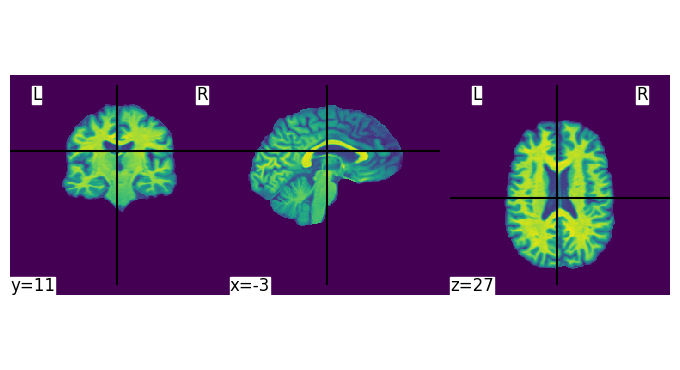

In [6]:
#Plots
plotting.plot_img(image_path)

In [21]:
img.get_fdata()

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [23]:
print(img.header)

<class 'nibabel.freesurfer.mghformat.MGHHeader'> object, endian='>'
version      : 1
dims         : [256 256 256   1]
type         : 0
dof          : 0
goodRASFlag  : 1
delta        : [1. 1. 1.]
Mdc          : [[-1.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  1.  0.]]
Pxyz_c       : [ -1.30867   27.210022 -12.727768]
tr           : 0.0
flip_angle   : 0.0
te           : 0.0
ti           : 0.0
fov          : 256.0


# Move all files to one directory

In [24]:
# Cleaned Image Directory
output_dir = Path.cwd() / "data/cleaned_data"
output_dir.mkdir(exist_ok=True, parents=True)

# Raw Image Directory
base_path = "../ABIDEII"

In [31]:
for csv_file in ["../ABIDEII/ABIDEII_Composite_Phenotypic.csv", "../ABIDEII/ABIDEII_Long_Composite_Phenotypic.csv"]:
    data = pd.read_csv(csv_file)

    # Iterate through each row in the CSV
    for index, row in data.iterrows():
        site_id = row['SITE_ID']
        sub_id = row['SUB_ID']
        dx_group = row['DX_GROUP']

        # MRI Images
        mgz_file = os.path.join(base_path, f"{site_id}/derivatives/freesurfer/sub-{sub_id}/mri/norm.mgz")
        new_file = os.path.join(output_dir, f"{site_id}_sub-{sub_id}_dx_{dx_group}.mgz")
 
        # GET FOLDER PATH THAT CONTAINS IMAGES
        if os.path.exists(mgz_file):
            shutil.copy2(mgz_file, new_file)
                
        else:
            print(f"Site ID: {site_id} and Subject ID: {sub_id} do not exist, skipping...")

../ABIDEII/ABIDEII-BNI_1/derivatives/freesurfer/sub-29006/mri/norm.mgz
/sfs/gpfs/tardis/home/ejh2wy/CHMCorr_Autism_Research/data/cleaned_data/ABIDEII-BNI_1_sub-29006_dx_1.mgz
../ABIDEII/ABIDEII-BNI_1/derivatives/freesurfer/sub-29007/mri/norm.mgz
/sfs/gpfs/tardis/home/ejh2wy/CHMCorr_Autism_Research/data/cleaned_data/ABIDEII-BNI_1_sub-29007_dx_1.mgz
../ABIDEII/ABIDEII-BNI_1/derivatives/freesurfer/sub-29008/mri/norm.mgz
/sfs/gpfs/tardis/home/ejh2wy/CHMCorr_Autism_Research/data/cleaned_data/ABIDEII-BNI_1_sub-29008_dx_1.mgz
../ABIDEII/ABIDEII-BNI_1/derivatives/freesurfer/sub-29009/mri/norm.mgz
/sfs/gpfs/tardis/home/ejh2wy/CHMCorr_Autism_Research/data/cleaned_data/ABIDEII-BNI_1_sub-29009_dx_1.mgz
../ABIDEII/ABIDEII-BNI_1/derivatives/freesurfer/sub-29010/mri/norm.mgz
/sfs/gpfs/tardis/home/ejh2wy/CHMCorr_Autism_Research/data/cleaned_data/ABIDEII-BNI_1_sub-29010_dx_1.mgz
../ABIDEII/ABIDEII-BNI_1/derivatives/freesurfer/sub-29012/mri/norm.mgz
/sfs/gpfs/tardis/home/ejh2wy/CHMCorr_Autism_Research/d

# Check for Non-Standard Images

### Check Image Dimensions and Pixel Dimensions

In [23]:
def get_unique_image_shapes_and_voxels(folder_path):
    unique_shapes = set()
    unique_pixel_dims = set()
    non_standard_files = []  # Store filenames that don't match criteria
    
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        try:
            img = nib.load(file_path)
            if img is not None:
                # Convert values to standard Python integers
                dimensions = [float(x) for x in img.shape]
                voxel_size = [float(x) for x in img.header.get_zooms()]
                
                unique_shapes.add(tuple(dimensions))  
                unique_pixel_dims.add(tuple(voxel_size)) 

                # Check if shape or voxel size is not [256,256,256] or [1,1,1]
                if dimensions != [256, 256, 256] or voxel_size != [1, 1, 1]:
                    non_standard_files.append(filename)
                    
        except Exception as e:
            print(f"Skipping {filename}: {e}")
    
    # Convert back to list of lists for the final output
    return (
        [list(shape) for shape in unique_shapes], 
        [list(pixel) for pixel in unique_pixel_dims], 
        non_standard_files
    )

# All Images
folder_path = output_dir
shapes, pixels, non_standard_files = get_unique_image_shapes_and_voxels(folder_path)

print("Unique image shapes in test set:", shapes)
print("Unique pixel dimensions in test set:", pixels)
print("Files with non-standard shapes or pixels:", non_standard_files)
print("Number of files with non-standard shapes or pixels:", len(non_standard_files))

Unique image shapes in test set: [[320.0, 320.0, 320.0], [256.0, 256.0, 256.0]]
Unique pixel dimensions in test set: [[0.699999988079071, 0.699999988079071, 0.699999988079071], [0.8984375, 0.8984375, 0.8984375], [1.0, 1.0, 1.0], [0.6999949216842651, 0.6999949216842651, 0.6999949216842651], [0.6999480128288269, 0.6999480128288269, 0.6999480128288269]]
Files with non-standard shapes or pixels: ['ABIDEII-TCD_1_sub-29113_dx_1.mgz', 'ABIDEII-IU_1_sub-29550_dx_2.mgz', 'ABIDEII-IU_1_sub-29542_dx_1.mgz', 'ABIDEII-IU_1_sub-29546_dx_2.mgz', 'ABIDEII-IU_1_sub-29573_dx_2.mgz', 'ABIDEII-TCD_1_sub-29119_dx_2.mgz', 'ABIDEII-IU_1_sub-29576_dx_1.mgz', 'ABIDEII-TCD_1_sub-29099_dx_1.mgz', 'ABIDEII-TCD_1_sub-29117_dx_2.mgz', 'ABIDEII-TCD_1_sub-29112_dx_1.mgz', 'ABIDEII-TCD_1_sub-29109_dx_1.mgz', 'ABIDEII-TCD_1_sub-29102_dx_1.mgz', 'ABIDEII-IU_1_sub-29558_dx_2.mgz', 'ABIDEII-IU_1_sub-29571_dx_2.mgz', 'ABIDEII-TCD_1_sub-29129_dx_2.mgz', 'ABIDEII-IU_1_sub-29553_dx_1.mgz', 'ABIDEII-IU_1_sub-29539_dx_1.mgz', '

### Check for images of all 0s

In [25]:
def check_zero_images(folder_path):
    zero_images = []
    
    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        # Ensure it's a file
        if os.path.isfile(file_path):
            try:
                # Load the image
                img = load_img(file_path)
                
                # Get the tensor values
                data = img.get_fdata()
                
                # Check if all values are zero
                if np.all(data == 0):
                    zero_images.append(file_name)
            except Exception as e:
                print(f"Error processing {file_name}: {e}")
    
    if zero_images:
        print("Images that contain only 0s:")
        for img_name in zero_images:
            print(img_name)
    else:
        print("No images contain only 0s.")

# Example usage
zero_files = check_zero_images(output_dir)
non_standard_files.append(zero_files)
len(non_standard_files)

Images that contain only 0s:
ABIDEII-IU_1_sub-29547_dx_1.mgz


81

### Remove Non-Standard Images

In [26]:
def remove_files_by_name(directory, file_names_to_remove):
    """Removes files from a directory if their names are in the provided list.

    Args:
        directory: The path to the directory.
        file_names_to_remove: A list of file names to remove.
    """
    for filename in os.listdir(directory):
        if filename in file_names_to_remove:
            file_path = os.path.join(directory, filename)
            try:
                os.remove(file_path)
            except FileNotFoundError:
                print(f"File not found: {file_path}")
            except Exception as e:
                print(f"Error removing {file_path}: {e}")

# Remove Files
remove_files_by_name(output_dir, non_standard_files)

Removed: /sfs/gpfs/tardis/home/ejh2wy/CHMCorr_Autism_Research/data/cleaned_data/ABIDEII-TCD_1_sub-29113_dx_1.mgz
Removed: /sfs/gpfs/tardis/home/ejh2wy/CHMCorr_Autism_Research/data/cleaned_data/ABIDEII-IU_1_sub-29550_dx_2.mgz
Removed: /sfs/gpfs/tardis/home/ejh2wy/CHMCorr_Autism_Research/data/cleaned_data/ABIDEII-IU_1_sub-29542_dx_1.mgz
Removed: /sfs/gpfs/tardis/home/ejh2wy/CHMCorr_Autism_Research/data/cleaned_data/ABIDEII-IU_1_sub-29546_dx_2.mgz
Removed: /sfs/gpfs/tardis/home/ejh2wy/CHMCorr_Autism_Research/data/cleaned_data/ABIDEII-IU_1_sub-29573_dx_2.mgz
Removed: /sfs/gpfs/tardis/home/ejh2wy/CHMCorr_Autism_Research/data/cleaned_data/ABIDEII-TCD_1_sub-29119_dx_2.mgz
Removed: /sfs/gpfs/tardis/home/ejh2wy/CHMCorr_Autism_Research/data/cleaned_data/ABIDEII-IU_1_sub-29576_dx_1.mgz
Removed: /sfs/gpfs/tardis/home/ejh2wy/CHMCorr_Autism_Research/data/cleaned_data/ABIDEII-TCD_1_sub-29099_dx_1.mgz
Removed: /sfs/gpfs/tardis/home/ejh2wy/CHMCorr_Autism_Research/data/cleaned_data/ABIDEII-TCD_1_sub-291

# Create Balanced and Labeled Training and Test Sets
Label (1 = ASD, 2 = Neurotypical)

In [27]:
# Total Number of Images in our Data Set
path = './data/cleaned_data'
print(f'Total Number of Images in Dataset: {len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])}')

Total Number of Images in Dataset: 844


In [28]:
def count_files_by_site_and_label(directory):
    """
    Counts files in a directory based on the testing site and the label (1 or 2) in the filename.

    Args:
        directory: The directory path to scan.

    Returns:
        A Pandas DataFrame with columns: 'Testing Site', 'Label 1 Count', 'Label 2 Count'.
    """
    file_counts = {}

    for filename in os.listdir(directory):
        match = re.match(r'([^_]*_[^_]*)_.*_dx_(1|2)\.mgz$', filename)  # Extract site and label
        if match:
            site = match.group(1)  # Extract site prefix
            label = match.group(2)  # Extract label (1 or 2)

            if site not in file_counts:
                file_counts[site] = {"Label 1 Count": 0, "Label 2 Count": 0}

            if label == "1":
                file_counts[site]["Label 1 Count"] += 1
            else:
                file_counts[site]["Label 2 Count"] += 1

    # Convert dictionary to DataFrame
    df_counts = pd.DataFrame.from_dict(file_counts, orient="index").reset_index()
    df_counts.rename(columns={"index": "Testing Site"}, inplace=True)

    return df_counts

# Call the function and store the result in a DataFrame
df_results = count_files_by_site_and_label(path)

# Display the DataFrame
print(df_results)


         Testing Site  Label 1 Count  Label 2 Count
0        ABIDEII-GU_1             38             36
1        ABIDEII-IP_1             22             32
2      ABIDEII-SDSU_1             33             24
3       ABIDEII-UCD_1             18             13
4      ABIDEII-OHSU_1             37             55
5      ABIDEII-UCLA_1             16             15
6       ABIDEII-KKI_1             56            154
7       ABIDEII-NYU_1             47             30
8       ABIDEII-EMC_1             21             19
9       ABIDEII-USM_1             16             16
10      ABIDEII-NYU_2             26              0
11  ABIDEII-UPSM_Long              8              8
12      ABIDEII-BNI_1             28             29
13      ABIDEII-KUL_3             27              0
14  ABIDEII-UCLA_Long             14              6


In [29]:
def find_best_split(df, train_ratio=0.9):
    """
    Splits testing sites into train and test sets while ensuring:
    1. An 80/20 overall data split.
    2. The ratio of Label 1 to Label 2 in the test set is close to the overall dataset ratio.

    Args:
        df (pd.DataFrame): DataFrame with 'Testing Site', 'Label 1 Count', and 'Label 2 Count'.
        train_ratio (float): Proportion of data to allocate to the train set (default is 0.8).

    Returns:
        train_df (pd.DataFrame): DataFrame for training sites.
        test_df (pd.DataFrame): DataFrame for test sites.
        summary_df (pd.DataFrame): DataFrame showing total sums for each column.
    """
    # Compute total counts
    df["Total Count"] = df["Label 1 Count"] + df["Label 2 Count"]
    total_images = df["Total Count"].sum()
    total_label_1 = df["Label 1 Count"].sum()
    total_label_2 = df["Label 2 Count"].sum()
    
    # Compute the desired test set size
    target_test_size = total_images * (1 - train_ratio)
    
    # Compute the ideal ratio of Label 1 to Label 2
    ideal_label_ratio = total_label_1 / total_label_2

    # Generate all possible combinations of sites that sum close to the target test set size
    best_test_sites = None
    best_ratio_diff = float("inf")

    # Try all possible site combinations (brute force, can be optimized for large datasets)
    for r in range(1, len(df)):  
        for subset in itertools.combinations(df["Testing Site"], r):
            subset_df = df[df["Testing Site"].isin(subset)]
            test_size = subset_df["Total Count"].sum()
            test_label_1 = subset_df["Label 1 Count"].sum()
            test_label_2 = subset_df["Label 2 Count"].sum()
            
            # Avoid division by zero
            if test_label_2 == 0:
                continue

            # Compute ratio of Label 1 to Label 2 in test set
            test_label_ratio = test_label_1 / test_label_2
            
            # Check if this subset is close to 20% of total images and has a good label ratio
            if abs(test_size - target_test_size) < target_test_size * 0.05:  # 5% tolerance on total size
                ratio_diff = abs(test_label_ratio - ideal_label_ratio)
                
                if ratio_diff < best_ratio_diff:
                    best_test_sites = subset
                    best_ratio_diff = ratio_diff

    # If a valid test split is found, separate train and test sets
    if best_test_sites:
        test_df = df[df["Testing Site"].isin(best_test_sites)]
        train_df = df[~df["Testing Site"].isin(best_test_sites)]
    else:
        raise ValueError("Could not find a good train/test split with the given constraints.")

    # Compute total sums for both train and test sets
    total_train = train_df[["Label 1 Count", "Label 2 Count", "Total Count"]].sum()
    total_test = test_df[["Label 1 Count", "Label 2 Count", "Total Count"]].sum()

    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        "Set": ["Train", "Test"],
        "Label 1 Count": [total_train["Label 1 Count"], total_test["Label 1 Count"]],
        "Label 2 Count": [total_train["Label 2 Count"], total_test["Label 2 Count"]],
        "Total Count": [total_train["Total Count"], total_test["Total Count"]]
    })

    return train_df, test_df, summary_df

# Assuming df_results is the DataFrame obtained from the previous function
train_df, test_df, summary_df = find_best_split(df_results)

# Display results
print("Train Set:\n", train_df)
print("\nTest Set:\n", test_df)
print("\nSummary:\n", summary_df)

# Optionally save results to CSV
# train_df.to_csv("train_sites.csv", index=False)
# test_df.to_csv("test_sites.csv", index=False)
# summary_df.to_csv("split_summary.csv", index=False)


Train Set:
          Testing Site  Label 1 Count  Label 2 Count  Total Count
0        ABIDEII-GU_1             38             36           74
2      ABIDEII-SDSU_1             33             24           57
4      ABIDEII-OHSU_1             37             55           92
5      ABIDEII-UCLA_1             16             15           31
6       ABIDEII-KKI_1             56            154          210
7       ABIDEII-NYU_1             47             30           77
8       ABIDEII-EMC_1             21             19           40
9       ABIDEII-USM_1             16             16           32
10      ABIDEII-NYU_2             26              0           26
11  ABIDEII-UPSM_Long              8              8           16
12      ABIDEII-BNI_1             28             29           57
13      ABIDEII-KUL_3             27              0           27
14  ABIDEII-UCLA_Long             14              6           20

Test Set:
     Testing Site  Label 1 Count  Label 2 Count  Total Count
1   AB

In [2]:
train_dir = Path.cwd() / "data/train"
train_dir.mkdir(exist_ok=True, parents=True)
test_dir = Path.cwd() / "data/test"
test_dir.mkdir(exist_ok=True, parents=True)

In [32]:
# Train/Test Directory Split with all test site images in test set and everything else in train set

# Define the two regex patterns
regex1 = r'(ABIDEII-IP_1)'
regex2 = r'(ABIDEII-UCD_1)'

path = './data/cleaned_data'
#os.rmdir('./data/cleaned_data/.ipynb_checkpoints')

for filename in os.listdir(path):
    
    orig = os.path.join(path, filename)

    # Check if the filename matches either regex pattern
    match1 = re.match(regex1, filename)
    match2 = re.match(regex2, filename)

    if match1 or match2:  # If either regex matches, copy to test_dir
        test = os.path.join(test_dir, filename)
        shutil.copy2(orig, test)
    else:  # Otherwise, copy to train_dir
        train = os.path.join(train_dir, filename)
        shutil.copy2(orig, train)


In [33]:
# CHECK - correct!
# Total Number of Images in our Data Sets
print(f'Total Number of Images in Cleaned Dataset: {len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])}')
print(f'Total Number of Images in Trian Dataset: {len([f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))])}')
print(f'Total Number of Images in Test Dataset: {len([f for f in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, f))])}')

Total Number of Images in Cleaned Dataset: 844
Total Number of Images in Trian Dataset: 759
Total Number of Images in Test Dataset: 85


# Check Spread of Tensor Values

In [34]:
# Test image - min value always 0
image_path = '../ABIDEII/ABIDEII-BNI_1/derivatives/freesurfer/sub-29006/mri/norm.mgz'
img = nilearn.image.load_img(image_path)
print(img.get_fdata().flatten().max())

121.0


### Spread of Max Values of all Images

In [35]:
def summarize_max_values(folder_path):
    max_values = []
    
    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        # Ensure it's a file
        if os.path.isfile(file_path):
            try:
                # Load the image
                img = load_img(file_path)
                
                # Get the tensor values
                data = img.get_fdata()
                
                # Store the max value
                max_values.append(np.max(data))
            except Exception as e:
                print(f"Error processing {file_name}: {e}")
    
    # Compute summary statistics
    if max_values:
        print("Summary Statistics of Max Values:")
        print(f"Min: {np.min(max_values)}")
        print(f"Median: {np.median(max_values)}")
        print(f"Mean: {np.mean(max_values)}")
        print(f"Max: {np.max(max_values)}")
        print(f"Std Dev: {np.std(max_values)}")
    else:
        print("No valid images found in the folder.")

# Test
print('Test:')
summarize_max_values(test_dir)
print(' ')
# Train
print('Train:')
summarize_max_values(train_dir)


Test:
Summary Statistics of Max Values:
Min: 121.0
Median: 168.0
Mean: 169.23529411764707
Max: 236.0
Std Dev: 26.9922198197156
 
Train:
Summary Statistics of Max Values:
Min: 115.0
Median: 170.0
Mean: 174.82608695652175
Max: 242.0
Std Dev: 37.44746066488405


### Spread of Average Summary Statistics over All Images

In [3]:
def summarize_all_values(folder_path):
    max_values = []
    min_values = []
    median_values = []
    mean_values = []
    std_values = []
    
    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        # Ensure it's a file
        if os.path.isfile(file_path):
            try:
                # Load the image
                img = load_img(file_path)
                
                # Get the tensor values
                data = img.get_fdata()
                
                # Store statistical values
                max_values.append(np.max(data))
                min_values.append(np.min(data))
                median_values.append(np.median(data))
                mean_values.append(np.mean(data))
                std_values.append(np.std(data))
            except Exception as e:
                print(f"Error processing {file_name}: {e}")
    
    # Compute summary statistics
    if max_values:
        avg_summary_stat = [
            np.mean(min_values),
            np.mean(median_values),
            np.mean(mean_values),
            np.mean(max_values),
            np.mean(std_values)
        ]
        
        print(f"Average Min over all Images: {avg_summary_stat[0]}")
        print(f"Average Median over all Images: {avg_summary_stat[1]}")
        print(f"Average Mean over all Images: {avg_summary_stat[2]}")
        print(f"Average Max over all Images: {avg_summary_stat[3]}")
        print(f"Average Std over all Images: {avg_summary_stat[4]}")
    else:
        print("No valid images found in the folder.")


# Test
print("Summary Statistics of All Test Values:")
summarize_all_values(test_dir)
print(' ')
# Train
print("Summary Statistics of All Train Values:")
summarize_all_values(train_dir)

Summary Statistics of All Test Values:
Average Min over all Images: 0.0
Average Median over all Images: 0.0
Average Mean over all Images: 6.70613789137672
Average Max over all Images: 169.23529411764707
Average Std over all Images: 22.546419706777005
 
Summary Statistics of All Train Values:
Average Min over all Images: 0.0
Average Median over all Images: 0.0
Average Mean over all Images: 5.730134113739601
Average Max over all Images: 174.82608695652175
Average Std over all Images: 20.05921448168322
